In [1]:
# ETHZ model: exploring the boosted model data
#
#
# Original: vikki.thompson 19/06/2023
# Last Editted 23/01/2024

# Need to change it to identify the max rainfall grid, then stick to that grid (not greatest grid for each day, same grid for all days)

In [2]:
### Load neccessary libraries
import subprocess
import numpy as np
import iris
import sys
import matplotlib.pyplot as plt
sys.path.append('/usr/people/thompson/WP1/boosting')
import functions_boosting as gboost
sys.path.append('/usr/people/thompson/WP1')
import functions_get_data as gdata
import functions_plot_data as pdata
import iris.coord_categorisation as icc
from iris.coord_categorisation import add_season_membership
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy as cart
import glob
import matplotlib.cm as mpl_cm
import sys
import scipy.stats as sps
from scipy.stats import genextreme as gev
import random
import scipy.io
import xarray as xr
import netCDF4 as nc
import iris.coords
import iris.util
from iris.util import equalise_attributes
from iris.util import unify_time_units
from scipy.stats.stats import pearsonr
import calendar
import cartopy.feature as cf
plt.ion(); plt.show()

/tmp/ipykernel_729142/427157596.py:31: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
## Variables
R1 = [70, 30, 30, -30] # analog region
date = [2021, 'Jul', 14] # event date

## Inputs
plotdate = '20070825' # '20090829' '20160801'
rain_region = [52, 48, 9, 4]


In [ ]:
startdates = ['20070818', '20070817', '20070816', '20070815', '20070814', '20070813', '20070812']
startdates = ['20070816', '20070815', '20070814', '20070813', '20070812']
plotdates = ['20070821','20070822','20070823', '20070824','20070825','20070826', '20070827']

mod24 = []; mod48 = []; mod72 = []; mod96 = []
for startdate in startdates:
    print(startdate)
    for i in range(50):
        X = []
        for plotdate in plotdates:
            X.append(gboost.get_TP_cube(startdate, plotdate, rain_region, i).data)
        mod24.append(np.max(X))
        X48 = []
        for j in range(6):
            X48.append(X[j]+X[j+1])
        mod48.append(np.max(X48))
        X72 = []
        for j in range(5):
            X72.append(X[j]+X[j+1]+X[j+2])
        mod72.append(np.max(X72))
        X96 = []
        for j in range(4):
            X96.append(X[j]+X[j+1]+X[j+2]+X[j+3])
        mod96.append(np.max(X96))
        print(i, np.max(X))
    print(mod24, mod48, mod72, mod96)


20070816
0 43.72689581941813
1 44.645667003351264
2 77.33229977020528
3 45.34032705123536
4 77.3338959334069
5 68.7652302076458
6 61.727167121716775
7 41.989553210441954
8 39.52827200919273
9 68.8391399307875
10 55.13981141120894
11 57.5803940591868
12 42.628421215340495
13 69.38314181752503
14 67.28976150043309
15 69.20791256561643
16 65.73087484866846
17 48.008502926677465
18 61.56807630759431
19 47.58337836392457
20 63.344768022943754
21 66.81470895273378
22 44.67770813789684
23 44.04490064189304
24 43.01541957829613
25 65.28751473524608
26 68.21413644502172
27 64.0533957266598
28 65.18616082757944
29 45.90412136167288
30 38.305741145450156
31 62.08490412973333
32 45.652119115402456
33 75.25303444708697
34 42.80489793018205
35 74.5454086427344
36 39.086603828764055
37 47.44063717225799
38 60.29219675838249
39 49.0260053993552
40 65.29312340717297
41 48.44586637773318
42 60.8289545198204
43 47.68764956679661
44 40.36667760374257
45 50.43330565968063
46 84.02983003179543
47 48.2332623

In [4]:
# Results from cell above
mod_24 = [62.08114700712031, 64.97228478110628, 62.67711014515953, 66.99342520732898, 68.61958645458799, 68.66176445328165, 67.68786424800055, 65.04460816358915, 67.04287188767921, 64.4626912617241, 62.30988947208971, 70.44025369395968, 62.54906838876195, 70.86948899086565, 68.77256764710182, 66.39886178163579, 70.09240307525033, 69.47800302441465, 66.92458882753272, 67.5741781378747, 64.9540492304368, 73.68484093603911, 72.50097405631095, 64.93585788120981, 62.1479943220038, 57.17730637115892, 62.87132146098884, 63.83089548762655, 65.79238361155149, 65.18353820865741, 63.18962587101851, 66.19476898777066, 62.17146528797457, 59.64982210571179, 62.29110877029598, 62.46106331673218, 65.98872150789248, 71.75465725595132, 65.6007065117592, 67.46884118911112, 65.25171647808747, 63.37872946460266, 66.89933015877614, 68.57333210064098, 61.73180827317992, 63.37146078294609, 64.54133053921396, 67.32269648637157, 64.92096690635663, 68.97328639752232, 59.57551948085893, 47.60398114740383, 54.48122956295265, 66.58643305854639, 50.890481179521885, 52.707189934153575, 66.48995113209821, 62.20704744919203, 59.49511214566883, 66.65093278570566, 65.99966873181984, 60.45996087777894, 62.286398861033376, 64.34135830204468, 64.7521075734403, 64.5397098196554, 64.98865895991912, 48.11985618289327, 76.46457142982399, 68.32362341810949, 60.046323778806254, 52.67692176857963, 59.105751461174805, 66.59379996563075, 69.43036860320717, 50.560316049086396, 68.14685202698456, 68.0337847370538, 57.318893414048944, 54.25215804280015, 68.36013380961958, 67.20169258187525, 61.34452996775508, 67.83460812584963, 65.7079637676361, 60.0871904680389, 69.20601190358866, 60.13923521095421, 67.20257661072537, 51.36586278240429, 49.48120658809785, 63.32786833809223, 60.44748133717803, 54.20904690254247, 60.958651374676265, 57.912003103410825, 72.77946770045673, 55.82717330980813, 63.644272086094134, 59.177323419135064, 43.72689581941813, 44.645667003351264, 77.33229977020528, 45.34032705123536, 77.3338959334069, 68.7652302076458, 61.727167121716775, 41.989553210441954, 39.52827200919273, 68.8391399307875, 55.13981141120894, 57.5803940591868, 42.628421215340495, 69.38314181752503, 67.28976150043309, 69.20791256561643, 65.73087484866846, 48.008502926677465, 61.56807630759431, 47.58337836392457, 63.344768022943754, 66.81470895273378, 44.67770813789684, 44.04490064189304, 43.01541957829613, 65.28751473524608, 68.21413644502172, 64.0533957266598, 65.18616082757944, 45.90412136167288, 38.305741145450156, 62.08490412973333, 45.652119115402456, 75.25303444708697, 42.80489793018205, 74.5454086427344, 39.086603828764055, 47.44063717225799, 60.29219675838249, 49.0260053993552, 65.29312340717297, 48.44586637773318, 60.8289545198204, 47.68764956679661, 40.36667760374257, 50.43330565968063, 84.02983003179543, 48.23326235054992, 68.96196100569796, 71.23075720301131, 47.367788283736445, 47.390714098582976, 50.08402586099692, 62.260030244942755, 42.87925949029159, 46.98516586358892, 54.463303422380704, 29.47200182461529, 50.28643900004681, 48.10332484339597, 43.14558300393401, 41.57736984780058, 27.91680599329993, 39.25428200091119, 67.44395577698015, 43.68796908238437, 54.305420781020075, 47.82818068633787, 45.18515052041039, 38.96728449035436, 43.604600250546355, 59.922441869275644, 59.149898879695684, 42.42194154358003, 43.81521030154545, 35.5348558514379, 46.37034835468512, 54.79076735355193, 41.76613947493024, 67.73157947463915, 51.11123791721184, 63.726545704412274, 56.42120631819125, 40.75399274370284, 49.71970774931833, 56.693492115300614, 51.620738122437615, 70.62473578116624, 62.486818023899104, 43.37542068242328, 44.29125492606545, 44.33883532328764, 44.24086528160842, 38.86007634719135, 48.89390693278983, 29.547971826104913, 52.08724996919045, 47.450312376895454, 67.84562410757644, 66.1209820464137, 70.74326440488221, 52.29215803410625, 80.7868389529176, 79.28410777822137, 67.01960228383541, 41.17634734939202, 63.18636478681583, 53.39753788575763, 45.787090675730724, 75.13825312344125, 56.47900707117515, 56.58691752614686, 45.68954300339101, 64.40196830226341, 70.62530548864743, 51.17575237818528, 67.91397918277653, 71.3529496351839, 28.60756649170071, 80.23859863897087, 78.51294485590188, 74.30727582686814, 61.57855696073966, 46.71804672398139, 55.58354969252832, 74.54134211002383, 57.34609694627579, 71.7566414095927, 49.53360494255321, 48.203549158643, 47.139045818767045, 49.562345702725, 32.47079712309642, 68.96751074236818, 52.862656229990534, 62.04054061527131, 54.041297516960185, 62.24657827260671, 63.21353885141434, 38.374142877728445, 41.922931814042386, 72.87857224582694, 53.6428264240385, 45.85156584653305, 78.66553314670455, 50.35793728893623, 67.64262652723119, 45.58142627502093, 60.16404695401434, 79.10839722171659, 69.46298926777672, 24.01879373792326, 17.47743331179663, 54.68573981488589, 51.76875893084798, 48.675487960281316, 39.57150593123515, 30.114612218312686, 45.81331686495105, 51.329529196664225, 56.73586656484986, 61.207780527183786, 34.03676337256911, 28.426708922779653, 38.37528229269083, 47.37013587146066, 66.31989344896283, 42.84522437956184, 48.868078556552064, 43.83443792903563, 42.3226110797259, 38.857790150359506, 31.6505165756098, 49.88138189219171, 34.68626919129747, 31.5829202918394, 23.39823495276505, 29.17780684583704, 64.94541521533392, 45.15644905040972, 15.238022479024949, 57.18685879401164, 28.33427142832079, 31.656466580898268, 24.943050811998546, 22.9267357099161, 46.17918202711735, 23.78013050474692, 41.42230136494618, 19.92655297726742, 48.24561910936609, 43.703812843887135, 48.06815522897523, 42.9903278927668, 50.775586896634195, 43.577868200372905, 54.13847193267429, 35.03289199215942, 30.795933253102703, 61.04827225499321, 22.37314211015473, 11.212078970856965, 32.750061836850364, 31.575003322359407, 12.975809841009323, 33.06352127765422, 10.695809805838508, 11.443345829320606, 39.88223961641779, 10.901569976340397, 18.02017914087628, 20.34406875282002, 35.949961420556065, 35.66409595805453, 46.090042451396585, 22.870857719681226, 23.408077140629757, 35.85769090932445, 40.996501502377214, 30.19643154402729, 22.840616566099925, 37.24018679349683, 31.824144753045402, 3.4148502777497924, 19.26507347889128, 11.331724908814067, 16.442738933619694, 14.722199011885095, 33.68597335793311, 11.816293044830672, 4.582941846820177, 6.977211819503282, 21.150515476620058, 19.064214757236186, 5.463074830913683, 38.6347496714734, 8.671451269037789, 16.85618326519034, 39.33859870812739, 23.155731105362065, 25.880892462737393, 41.227721703762654, 14.4244691455242, 9.695886001281906, 21.16928635587101, 42.51534901413834, 13.008808673475869, 14.105758327787044, 25.30278670747066, 29.28659641838749]
mod_48 = [101.35433003597427, 114.35619417170528, 109.08259864663705, 112.9371412389446, 114.28565358073683, 112.58724262006581, 110.17403048754204, 101.61392756344867, 103.09350454917876, 110.20242254744517, 111.20093313365942, 113.92519081709906, 101.23225792995072, 115.91693237278378, 114.16890774853528, 106.11553752823966, 112.4449434428243, 115.66073590074666, 109.61648822558345, 114.08819591451902, 111.66608455823734, 114.5367374192574, 121.66573269496439, 98.823124608316, 106.8384373866138, 103.6189418300637, 109.68912101816386, 110.11448132194346, 110.12297291017603, 104.2979201884009, 99.13998510455713, 110.86422618973302, 108.78504435822833, 104.4735226969351, 106.32368212100118, 103.32663277949905, 113.01726372039411, 110.03398312823265, 110.51616438635392, 113.63967405486619, 104.43177934575942, 109.49300904030679, 116.06838124862406, 113.89002611394972, 99.91150654968806, 112.02117930224631, 110.79087144025834, 113.62811783328652, 114.26105302234646, 115.27873721206561, 103.3558597555384, 82.71313290606486, 88.8905742613133, 112.88761106698075, 84.76923176203854, 83.58076793228975, 106.43424466252327, 109.96591536240885, 107.1984630470979, 109.57552822219441, 112.67677509749774, 105.06035087018972, 111.24980028398568, 111.34624292026274, 112.09954845980974, 99.91067163355183, 109.44308596663177, 82.03843472074368, 115.73855008464307, 112.81698207312729, 110.48516935261432, 88.91578872862738, 101.77313379244879, 105.6081000569975, 118.31129504571436, 83.92318914047792, 111.73042221344076, 105.74269099379308, 105.85777436062926, 84.91845092066796, 114.87313986435765, 113.4008438384626, 102.50121749777463, 100.50775699710357, 110.64583177358145, 98.63381474133348, 102.58001393594895, 106.97708257794147, 106.92029845813522, 93.72937001899118, 87.42938262003008, 112.1649518609047, 108.8580700525199, 103.95247609267244, 91.12482948694378, 94.99466577835847, 117.34528234228492, 104.49294677528087, 105.42645668465411, 102.53906621073838, 68.57659564047935, 65.5625508443336, 107.32113678386668, 74.75033389710006, 112.7386865846347, 106.21128767525079, 91.67341850115918, 59.819346915901406, 50.02420166420052, 112.11616329092067, 93.37787032563938, 80.20483855943894, 64.96880760096246, 94.6243534599489, 106.474973836157, 114.18818940001074, 105.3933448929456, 85.23957931174664, 88.01932945061708, 74.20095416819095, 106.7982091626618, 100.58849584311247, 58.593218545865966, 66.69846161457826, 55.21923649212113, 100.74904530483764, 106.91500410757726, 107.24742351158056, 102.00798096775543, 61.69323023641482, 63.67998439600342, 110.26063584722579, 63.53705657602404, 111.12407419204828, 57.612206819612766, 97.60250177350827, 60.24337626513443, 79.56934705362073, 97.44243361637928, 70.77656282490352, 117.1247417005361, 87.36988993405248, 100.3791946459387, 66.9027876938344, 55.71353140112478, 79.78334588187863, 123.19317247602157, 69.99145925874473, 113.26194326102268, 115.98990895436145, 70.992270775605, 57.27209452288662, 92.45904020644957, 85.56177590435254, 49.49694844071928, 79.30989195301663, 98.44449996307958, 39.00693318428239, 88.61444048307021, 74.65361377398949, 62.297238036990166, 50.323608729740954, 36.766924404219026, 53.35955779628421, 114.98943877086276, 69.15803369338391, 95.97167972970055, 88.66506341291824, 70.16879544607946, 63.35272182695917, 73.97437757390435, 88.41872877383139, 92.32745496774442, 63.52747959681437, 74.76550481442246, 42.98594028568914, 75.30786879215157, 79.65476879689959, 63.47481848933967, 90.93361159102642, 90.13496273837518, 104.7478687723924, 87.08124714758014, 72.24444116218365, 87.72478577157017, 89.96571541501908, 96.97313707874855, 107.95242424137541, 97.68137679202482, 72.80359186552232, 68.16102350057918, 67.75321608074591, 66.3896678815945, 48.382282602688065, 90.01735252240906, 55.45982985495357, 77.81299536873121, 82.89500710816355, 91.89958254864905, 107.90300457301782, 111.84650256836903, 93.22264468210051, 110.81435468440759, 116.86150492096203, 81.70809155672032, 54.24661076176562, 79.42465485939465, 87.89545490799355, 76.40026324224891, 102.23384542769054, 77.04809677306912, 91.10804276133422, 61.917726907267934, 99.5690313175146, 103.50837192163453, 77.05921098022372, 107.10080487115192, 111.10743234894471, 33.33676078227654, 122.10647018946474, 97.32783278195711, 91.4595731501322, 81.87764092326688, 76.49101617062115, 85.04703537255409, 91.56922833426506, 100.80522042699158, 112.81731849521748, 66.0475904624036, 80.2824882157438, 81.19853118842002, 62.46638467928278, 50.104667934647296, 92.45277833542787, 85.56742141081486, 112.34813246119302, 87.12553944860701, 105.3520361892879, 91.88036228806595, 54.942754013609374, 49.84930208138394, 102.12126926489873, 73.17743661587883, 69.42095124031766, 104.01300014564185, 89.24129306251416, 91.65936489807791, 90.0194496352924, 87.469458594569, 113.87698177713901, 115.51386432984145, 45.11572969931876, 34.444047741999384, 94.27877921552863, 93.97933408763492, 63.38313241940341, 64.73362154792994, 48.98562492599012, 74.20504525725846, 87.74891730354284, 83.18952623085352, 74.57180549863551, 48.22723253710137, 46.89227898779791, 76.67839590794756, 84.24907655353309, 97.51550351211336, 64.29571049011429, 75.24796355937724, 86.82770767336478, 68.00944447604707, 74.51217898051254, 56.440151547576534, 91.13875785260461, 45.87668086060148, 40.907719835558964, 37.97619483520975, 32.87407635070849, 99.34946310750092, 75.85434841530514, 22.598428881792643, 68.68975747238437, 38.881658929312835, 62.23198688530829, 28.984286791455816, 31.547576327284332, 71.15809003153117, 33.9695839329579, 50.1611450999917, 21.51566988572995, 81.64621076502954, 56.84917205144302, 57.56404075327737, 61.80141817822005, 69.12455969541043, 46.251548997133796, 82.46803836300387, 62.17958607521723, 61.53767799332854, 78.02387185620319, 23.748368545284393, 16.018710812204517, 39.24899317553354, 38.37634558294667, 16.24270714728482, 45.39461624517571, 13.732501702179434, 13.124052117063911, 42.728664868718624, 12.05387334266561, 29.041924244666006, 27.49851976204809, 40.805631078910665, 49.71368039150548, 71.648063021712, 26.615955391662283, 35.86585835364531, 51.00668677187059, 54.08732104115188, 47.94613469130127, 30.06740139426256, 43.1841530598831, 38.18551813310478, 3.4148503325977155, 20.1819958761007, 12.615829533046963, 25.04729561678687, 17.08050374418235, 40.04243055533152, 12.150409638422843, 6.903807343405788, 12.589570883392298, 29.952636032248847, 22.624596749665216, 7.937124570389642, 66.09261208723183, 9.289137190648944, 24.8913394216288, 78.53009501559427, 25.122551949152694, 39.25921905647556, 66.99975338051445, 18.420285073261766, 9.705489876776774, 37.139903542993125, 53.63037389543024, 15.441098486235205, 16.91385540425472, 28.317090573182213, 34.54685477208841] 
mod_72=[104.93352864386907, 117.22457587666213, 111.81528223005444, 116.71373980561839, 117.56060752077246, 115.39034708221152, 114.99678449808926, 103.64365703594558, 106.72846112811385, 113.60440314547304, 119.37779665913695, 117.94047809416952, 111.39877019559208, 119.2116569427526, 116.87688272559171, 110.1271118841396, 115.7417712647657, 118.83306329991683, 113.0166700704649, 117.44491853278305, 114.6251356999528, 118.45397392562518, 124.41170495094411, 106.97115897073672, 109.77144988828513, 107.23071505935877, 112.02063814153007, 113.01998180215378, 113.08890044574582, 107.26187462068992, 104.73576310232602, 113.48570017162274, 112.4943001855172, 107.23054807613153, 108.88606445291771, 106.99864060370601, 116.57727307010646, 114.68615671219595, 120.13395994472376, 116.08629219495015, 106.99683893449219, 112.32531377345367, 118.39036037599726, 117.9187573825402, 106.69510929801618, 115.56324992625377, 113.71540217623988, 116.47489823189972, 117.55424159218819, 118.1190770921603, 105.8321877110302, 89.26362461352255, 92.40961378509382, 116.53916590148583, 89.01181390683632, 92.91635631143436, 115.09677767662652, 114.9416441194262, 111.41771542497736, 113.44288493546628, 115.50592894309375, 107.707361314624, 116.42865615613118, 114.45216317724771, 115.46993423507956, 105.35718995470233, 118.82472672368749, 89.48085505835479, 119.40144934214914, 116.10107773094569, 113.43140084818515, 91.61151745047391, 103.89479259629297, 109.47393396918415, 123.25858938311285, 94.15797298970574, 120.42647404086892, 114.63380133136525, 108.94106961814032, 94.43254191410233, 122.33272325374855, 119.15750158095761, 105.42609938966052, 108.37932668437134, 115.8461192062532, 103.09800695722515, 106.88170906405503, 109.97392288345509, 110.14261523314417, 104.3943173954176, 98.45764866440732, 120.12827821763494, 111.73636055445968, 106.27137355072591, 98.91123097531818, 102.6556554961644, 120.52571763661035, 110.14086958311964, 110.62221960855823, 106.20154494063172, 78.80276757532556, 76.09029694322089, 116.62780145798024, 86.02690768384491, 115.57804267567917, 109.41107429971453, 96.34291690190366, 68.85264961056237, 53.35452589179113, 114.78855518589626, 104.36740853947413, 84.00267929573602, 77.75029685035406, 107.41146365944587, 109.68838248572865, 117.90566823037807, 117.0363781056949, 93.2576602053814, 97.76112601684872, 80.16865538138518, 116.4834340215748, 104.87479290759438, 69.1206417286594, 77.55073470434581, 63.35183227292873, 103.9511666249382, 112.10763916551514, 112.39686792805514, 111.20914355160494, 70.75018561408797, 69.92200160311768, 113.58209584386714, 69.7800609486876, 114.6959286074889, 85.96387151555973, 107.62579338461364, 63.23697605239431, 88.54254131165362, 100.10358361114413, 80.58292910391174, 120.57990338689706, 90.05088729736599, 101.95370113592617, 72.37073757551116, 62.881615485821385, 85.58891804568702, 128.7462181153387, 76.02783232414367, 115.72125381462683, 119.74996267554161, 72.15074139423905, 68.8029610500962, 95.66364601596433, 94.30842671918072, 56.51362293974671, 87.86935150055797, 100.77227162810232, 49.1148687160603, 89.81240056300521, 76.53675959886641, 62.65743321307582, 60.78106594031851, 37.720488262493745, 58.36407611923278, 117.32681841749582, 75.27400312028476, 98.56534394430128, 88.93766848103724, 79.22370036794746, 69.14703490110696, 80.40868701755244, 90.62384665412537, 95.0420567846777, 70.60300279135845, 80.77457919171138, 55.973898770389496, 83.32572990639164, 85.93564643888385, 72.61696293880959, 95.54614875924017, 90.68320109548722, 111.20682052023767, 87.77644766553294, 77.46629705707164, 88.14071589711148, 90.12601313571622, 100.67842030139218, 109.43431428245276, 106.3360529997226, 81.782894517346, 72.80175658479493, 69.5505199416857, 71.14077166079369, 66.58211605099496, 99.28164765824476, 58.00872430086201, 85.46310170913785, 89.99169911021454, 97.84488590867113, 112.20240644433943, 149.0183269197587, 102.81652541834774, 133.06205310072983, 127.29310428767349, 96.0447201578063, 62.70059154758201, 90.79876404030074, 108.06615332512592, 81.23496791085927, 118.60342974614468, 83.92929016736161, 98.33311478359974, 78.98555159044918, 109.63535364680865, 113.97153602956678, 85.25270222889958, 111.06017855126993, 118.29599582142691, 40.3398685079992, 137.36636255998746, 108.78038356167963, 104.0929863393103, 93.15189167864446, 95.40450155327562, 86.57579996906861, 96.75176704604382, 104.74285252257687, 125.66766254167305, 78.67701692703122, 87.55763310546172, 86.22525674581993, 72.61955731792114, 67.49643025614205, 99.15060818457277, 88.07737331153476, 113.42879887195068, 92.85792630180367, 107.69661760150484, 109.66787485813256, 60.08607867897808, 57.54189398885501, 110.94697681528487, 89.3552713932877, 90.02035085359239, 110.08451765519567, 96.48477559949242, 94.81090411327386, 91.11508890100595, 104.31981218061992, 145.77746242139256, 119.90647108177654, 51.48866482613812, 38.8490011232534, 104.23438736779644, 104.68590571690584, 71.69269235873799, 69.52531452952826, 63.50945768645033, 94.5955292081635, 109.01366649704869, 90.36040974024218, 80.87693438483257, 57.32721433560073, 50.78021331428317, 78.502164768679, 106.69419825717341, 101.90172192778846, 82.85349213110749, 78.73059582834685, 90.40484109164026, 73.71789870376233, 77.57730253388218, 58.28001648637837, 102.03834244748577, 50.0360522551091, 44.092975235798804, 44.26637442520587, 37.354626476826525, 104.82867207883828, 76.58524343980844, 28.45535514097719, 74.39092091772181, 43.26098928686406, 63.48119493111426, 31.170578540695715, 34.17250692336893, 78.94527670941898, 40.71734790613846, 59.519620003811724, 29.98056106093827, 84.35923207343876, 61.12278698537921, 60.4428497013032, 71.64154392285127, 79.54756065373658, 48.8388396092887, 89.27208734803571, 70.85282934440329, 70.4625551634308, 89.03419825401215, 25.030261869574133, 16.10968523699796, 45.025028339296114, 39.80030825232461, 16.6245461812764, 57.64428233305807, 13.811009348962955, 13.890513955061579, 44.071582505011975, 12.202931657157023, 33.9368542995544, 27.818818934832734, 41.150180824445215, 58.254269606550224, 85.37500884813198, 29.192682166012673, 40.265181883114565, 54.76670488633317, 60.68104974019661, 58.57867381564574, 37.49653244540241, 46.39771610754906, 40.82696502791805, 3.4148973239975495, 20.268335537920734, 12.81517514186703, 27.03420755096886, 17.210919860488616, 40.952468040700296, 12.173493330980278, 7.998128546660155, 12.889037766683487, 30.350531432077332, 28.962358578610292, 8.372612913376543, 67.53121249403193, 9.4046769987699, 26.931397451335215, 92.54501201212406, 25.971414561354322, 43.29308413844046, 68.2462415795726, 19.837603866790232, 9.72936633198973, 45.10774274422147, 56.37776735056832, 16.751083745703, 16.995944235986826, 28.83759885605741, 39.72726628944656] 
mod_96 = [106.0718314334963, 118.35979193222101, 116.1212375791365, 120.03619341385274, 118.27560184372032, 117.98531155591263, 115.54224276864034, 105.03136209081276, 109.55879459970674, 114.88058995610118, 119.86761651741062, 118.63298117305021, 113.00225487502757, 121.15739262412717, 118.70805440707954, 112.35503448574491, 116.41936740716119, 119.10954230600623, 113.4760906168708, 120.49048079916247, 115.31877949835234, 120.2082912698188, 125.47916410881044, 108.72686804646037, 111.29279831152417, 108.08908589297062, 113.67145412464197, 114.85317723440858, 113.17959776739883, 108.48863999797231, 106.329969315766, 116.66521429560817, 113.77845054596492, 108.73463660345806, 110.96273048565308, 108.7140273739351, 118.05347263589283, 117.3770321770462, 123.24305411084424, 116.73432562986363, 108.09848161557056, 113.08840686297117, 120.27431272372269, 119.3440359656961, 107.99602666224928, 116.32543527468897, 114.58766814769206, 117.40869644825125, 118.82340666602431, 120.08247109633885, 108.12351881668292, 90.02572915619567, 95.11403023907405, 119.89415085054134, 90.01015259855194, 93.6664514910035, 115.93702952552576, 115.49689043874878, 111.52542087273787, 115.24974398184895, 115.5724761428445, 108.68131101631207, 116.84591704437253, 114.78048895980919, 115.71352884516273, 106.26154486885753, 119.33340317824559, 90.98522429553668, 121.15498165030658, 118.16663661647908, 114.36891605285382, 92.48826035275215, 104.36251384362549, 110.98395930275728, 124.00952362270345, 95.27310731698435, 121.25660145727579, 115.34006748092906, 109.47281512017071, 95.3195311097943, 122.68733891858119, 119.75186383637038, 107.05169261768788, 109.9849859826918, 116.06970617918932, 105.50915604881084, 109.04559283062554, 111.1294427488474, 110.35792548597101, 105.19745844987938, 99.18967166981929, 120.4425848527535, 111.85649506799678, 108.0294497057821, 99.91400569617781, 103.51692873769025, 121.51459714289103, 111.77415217389353, 111.64289299756547, 106.7168935875884, 84.99261848555761, 77.87283767584086, 121.00385630446908, 90.01315277146205, 116.13777409849035, 110.6610863359947, 96.57268411515929, 74.53306723164133, 53.51925864403029, 115.42386877323452, 106.33255893708338, 87.94630713282459, 85.34090191005816, 107.84661953238128, 112.0109787450474, 119.69244063720907, 117.46286182443555, 95.11584341908019, 100.57438637431915, 80.70008080665048, 117.25794167318782, 106.72250544416784, 69.43678174522461, 77.80566949762147, 66.76187656466936, 104.05017075783007, 113.26636992805561, 113.68883849058875, 112.23564500824068, 70.95428086358879, 75.05500983597813, 114.75491382100245, 70.18560104938842, 116.18703096587524, 94.70835216234263, 109.506328868747, 66.3330353972924, 88.74635021101085, 100.22912650882176, 81.28187262457232, 120.82790563283652, 91.56695779211077, 102.42361288703705, 72.51630634534934, 71.23773427792912, 89.88091310584423, 132.0699136613257, 78.32153741560433, 117.44349012019484, 122.38415040428663, 76.05690643686103, 75.05074593154859, 96.82350276420948, 97.1101443610678, 56.639180408168954, 88.37951883293726, 101.31833337112539, 54.33768046714249, 90.07298746226411, 76.56523117676173, 62.761770200125966, 60.983808710091125, 38.09990887901904, 58.689677796053275, 118.59436254155753, 78.76543423890325, 99.33706767242256, 89.17638021301855, 82.60466011051903, 70.53891346231467, 83.48833719082904, 91.51958589370679, 96.72784055965167, 75.63322977830467, 84.9012820367534, 60.398182608878415, 83.45500349022927, 86.64274758132251, 72.99560811162564, 96.40822752601252, 90.900961765783, 112.3403721919658, 88.42489648657192, 79.43313785290229, 88.51879370297411, 90.24956171188592, 100.69963151897454, 110.41778693936521, 109.2802853008834, 83.0083308585472, 73.97495794805309, 71.02522141622103, 77.61111141917354, 74.14543408685859, 100.25476574355707, 58.03909091248727, 86.67639892223633, 90.76226723152558, 101.84127492038897, 112.6831310116927, 158.1476910132551, 107.69908889187718, 135.36369434632434, 133.84212384153216, 97.13434633908946, 65.17286137324163, 96.77631235263107, 113.30903682846838, 84.27794439285208, 122.59671698302554, 84.13229741677242, 103.68681682848546, 86.82119931791021, 113.72528825859263, 120.38517331802723, 88.0639857996357, 123.09545904827246, 118.68937427124138, 40.8799023176698, 147.0484951596518, 111.69641595643043, 113.06433211757394, 93.23103671157185, 97.14064519812382, 87.10399120701595, 105.49528692536114, 107.76925591926556, 129.5995423106433, 84.57099320366979, 88.35102398165873, 87.26020858205175, 73.65849303937466, 70.29735534160864, 109.74079987136065, 88.1633363402301, 120.95397344182857, 96.06562805402064, 108.27321812882928, 112.10236338570212, 61.290243229450425, 60.28257005255, 114.23316129821615, 96.34181462843117, 113.48706366334227, 110.10008006655525, 98.72203115151024, 96.85515237833897, 91.15057442912189, 108.15358132276742, 145.82926335133806, 121.30139217561009, 56.46729184718424, 38.90131755923676, 104.59439522492175, 106.5084433832908, 73.85758953546429, 70.35162980173482, 64.51488641232572, 94.80872141764962, 117.56521644201712, 94.87127468901235, 85.49975268579146, 58.961984734651196, 50.7991469525404, 78.51890348229418, 113.50955360285298, 102.09735793438313, 94.89539424976101, 79.57077370122079, 90.61852941627535, 74.34838504849495, 77.63131137288326, 58.28663134663792, 102.4058881853307, 52.981529563567165, 44.15712242096248, 57.94870472755065, 42.27205107554255, 105.57423070167715, 76.76363474473646, 28.724421388659493, 76.80599948685085, 43.366432451463766, 63.58049314556524, 32.33906155344357, 39.1735342532229, 90.85049937311851, 41.40554802063434, 68.50963352462713, 30.45383526796286, 85.81166031831344, 68.57332688241513, 64.1220605189119, 72.13555094693902, 85.32340120837034, 48.98510104105469, 96.59034276410239, 72.24495653872509, 70.85145975196383, 91.9401941587239, 25.132134271288464, 16.387355610092413, 47.87315626799682, 39.96948731668226, 16.903880727170417, 57.83489550950094, 14.749797124480324, 13.987690692118804, 52.434836894832415, 12.383874022248165, 36.030001484732566, 33.28000119814378, 41.29953337397296, 58.86705242943435, 88.05064187527023, 29.31654507314363, 40.41207765546062, 54.772816073889175, 60.85857326567634, 64.91931303571619, 39.007970383408974, 46.80691564260542, 42.69770774385506, 3.614605541960329, 20.455269193675463, 12.829678697023894, 28.040795260153573, 17.616873582326775, 40.99941251460848, 12.22330358929824, 9.537190697983533, 12.906938160250903, 30.91349211175043, 30.54654625884723, 8.39268715964181, 67.84040169947048, 9.49688902558421, 27.0376401843464, 99.49844345555903, 27.812192229248467, 43.35376854633921, 68.3049998674079, 20.680882823853608, 9.73950695872805, 45.19344644435819, 56.80107896353093, 18.183290291062804, 17.601904650632605, 28.915774723436982, 40.397344196207996]

In [25]:
mod = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/tp_'+plotdate+'.nc')[0]
# E-OBS
file = '/net/pc230042/nobackup_1/users/sager/ClimateExplorer/sandbox/ENSEMBLES/rr_0.25deg_reg_v30.0eu.nc'
eobs_cube = iris.load(file)[0]
iris.coord_categorisation.add_year(eobs_cube, 'time')
iris.coord_categorisation.add_season(eobs_cube, 'time')
iris.coord_categorisation.add_day_of_year(eobs_cube, 'time')
eobs_cube = eobs_cube.extract(iris.Constraint(season='jja'))
eobs_cube = eobs_cube.extract(iris.Constraint(year=2021))
eobs_cube = eobs_cube.extract(iris.Constraint(day_of_year=lambda cell: 190 < cell < 200))
lat_con = iris.Constraint(latitude=lambda cell: 48 < cell < 52)
lon_con = iris.Constraint(longitude=lambda cell: 4 < cell < 9)
event_prec = eobs_cube.extract(lat_con&lon_con)
event = gdata.regrid(event_prec, mod) # regrid era-5 to model grid
event = event.extract(lat_con&lon_con)
#event = event.collapsed(('longitude', 'latitude'), iris.analysis.MEAN)

obs24 = np.max(event.data)
E2 = event.data[:-1,:,:]+event.data[1:,:,:]
obs48 = np.max(E2)
E3 = event.data[:-2,:,:]+event.data[1:-1,:,:]+event.data[2:,:,:]
obs72 = np.max(E3)
E4 = event.data[:-3,:,:]+event.data[1:-2,:,:]+event.data[2:-1,:,:]+event.data[3:,:,:]
obs96 = np.max(E4)

In [26]:
print(obs24, obs48, obs72, obs96)

97.40026 129.76558 133.68521 135.98167


In [ ]:
# ERA5 vals used previously
#obs24= 98.53371; obs48=128.13979; obs72=135.15457; obs96=139.78673


350

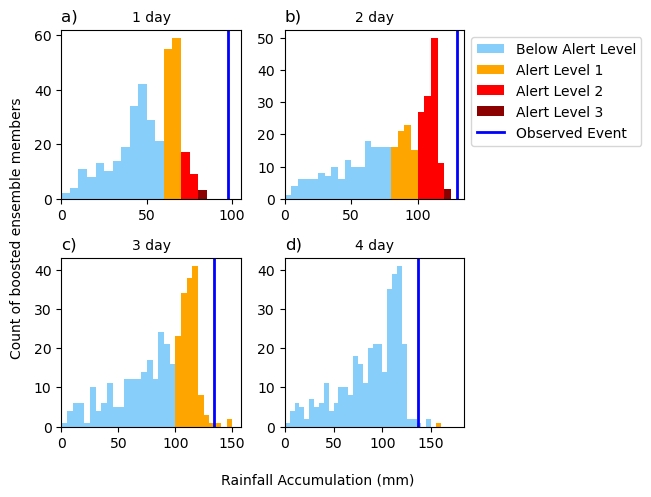

In [58]:

from matplotlib.ticker import PercentFormatter
## Histogram
fig1, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,5))
#axs[0].fill_between([1.5, 2.2], 0, 52, color='salmon', alpha=.5) # OBS (needs to be a line)
axs[0,0].hist(mod_24, bins = np.arange(0,105,5), color='lightskyblue', label='Below Alert Level')
axs[0,0].hist(mod_24, bins = np.arange(60,105,5), color='orange', label='Alert Level 1')
axs[0,0].hist(mod_24, bins = np.arange(70,105,5), color='red', label='Alert Level 2')
axs[0,0].hist(mod_24, bins = np.arange(80,105,5), color='darkred', label='Alert Level 3')
axs[0,0].axvline(obs24, color='b', linewidth=2, label='Observed Event') 
axs[0,0].set_title('a)', loc='left')
axs[0,0].set_title('1 day', fontsize=10)

axs[0,1].hist(mod_48, bins = np.arange(0,130,5), color='lightskyblue', label='Below Alert Level')
axs[0,1].hist(mod_48, bins = np.arange(80,130,5), color='orange', label='Alert Level 1')
axs[0,1].hist(mod_48, bins = np.arange(100,130,5), color='red', label='Alert Level 2')
axs[0,1].hist(mod_48, bins = np.arange(120,130,5), color='darkred', label='Alert Level 3')
axs[0,1].axvline(obs48, color='b', linewidth=2, label='Observed Event') 
axs[0,1].set_title('b)', loc='left')
axs[0,1].set_title('2 day', fontsize=10)
axs[0,1].set_xlim(0, 135)

axs[0,1].legend(bbox_to_anchor=(1, 1))

axs[1,0].hist(mod_72, bins = np.arange(0,155,5), color='lightskyblue')
axs[1,0].hist(mod_72, bins = np.arange(100,155,5), color='orange')
axs[1,0].hist(mod_72, bins = np.arange(150,155,5), color='red')
axs[1,0].axvline(obs72, color='b', linewidth=2) 
axs[1,0].set_title('c)', loc='left')
axs[1,0].set_title('3 day', fontsize=10)

axs[1,1].hist(mod_96, bins = np.arange(0,180,5), color='lightskyblue')
axs[1,1].hist(mod_96, bins = np.arange(150,180,5), color='orange')
axs[1,1].axvline(obs96, color='b', linewidth=2) 
axs[1,1].set_title('d)', loc='left')
axs[1,1].set_title('4 day', fontsize=10)

fig1.text(0.5, 0.01, 'Rainfall Accumulation (mm)', ha='center')

for ax in axs.reshape(-1):
    #ax.yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
    #ax.set_yticks([])
    ax.set_xlim(left=0)

fig1.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Count of boosted ensemble members")

plt.tight_layout()

plt.savefig('ThompsonBoosting_Fig3.png', dpi=80)

In [53]:
60/350*100

17.142857142857142

In [ ]:
# Identify top ?10? 4 day persstence events

# plot individual 'event day' dynamics

# plot composite

In [ ]:

axs[1].hist(max48, bins = np.arange(0,130,5), color='teal')
axs[1].hist(max48, bins = np.arange(80,130,5), color='orange')
axs[1].hist(max48, bins = np.arange(100,135,5), color='red')
axs[1].hist(max48, bins = np.arange(120,135,5), color='darkred')
axs[1].axvline(obs48, color='k') 
axs[1].set_title('2 day')

axs[2].hist(max72, bins = np.arange(0,180,5), color='teal')
axs[2].hist(max72, bins = np.arange(100,185,5), color='orange')
axs[2].hist(max72, bins = np.arange(150,185,5), color='red')
axs[2].axvline(obs72, color='k') 
axs[2].set_title('3 day')

axs[3].hist(max96, bins = np.arange(0,200,5), color='teal')
axs[3].hist(max96, bins = np.arange(150,200,5), color='orange')
axs[3].axvline(obs96, color='k') 
axs[3].set_title('4 day')

for i in range(4):
    axs[i].set_yticks([])
    axs[i].set_xlim(left=0)

#axs.set_xticks(np.arange(.4, 3, .7))
#axs.set_xticklabels(range(4))
#axs.set_xlim([.1, 2.9])
#axs.set_ylim([0, 52])
#axs.axvline(.8, color='k', linewidth=.5)
#axs.axvline(1.5, color='k', linewidth=.5)
#axs.axvline(2.2, color='k', linewidth=.5)
#axs.set_xlabel('Rainfall Persistence (days)')
#axs.set_ylabel('Occurrences')
plt.tight_layout()

In [10]:
## Observed presistence
mod = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/tp_20070823.nc')[0]
mod = gboost.extract_region(mod, rain_region)
# Event day
X = []

for day in range(10, 19):
    event_prec = gdata.var_event_data('tp', rain_region, (2021, 'Jul', day))
    event = gdata.regrid(event_prec, mod)
    X.append(event.data)

obs24 = np.max(X)
X48 = []
for i in range(8):
    X48.append(X[i]+X[i+1])

obs48 = np.max(X48)
X72 = []
for i in range(7):
    X72.append(X[i]+X[i+1]+X[i+2])

obs72 = np.max(X72)
X96 = []
for i in range(6):
    X96.append(X[i]+X[i+1]+X[i+2]+X[i+3])

obs96 = np.max(X96)
print(obs24, obs48, obs72, obs96)


2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

98.53371 128.13979 135.15457 139.78673
